In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from functions import av_err, savetocsv

In [43]:
data = pd.read_csv("Data/LYSO/Na22/LYSO_Na22_final.csv", 
                   nrows = 5000
                  )

Text(0.5, 1.0, 'Counts Recorded per Channel')

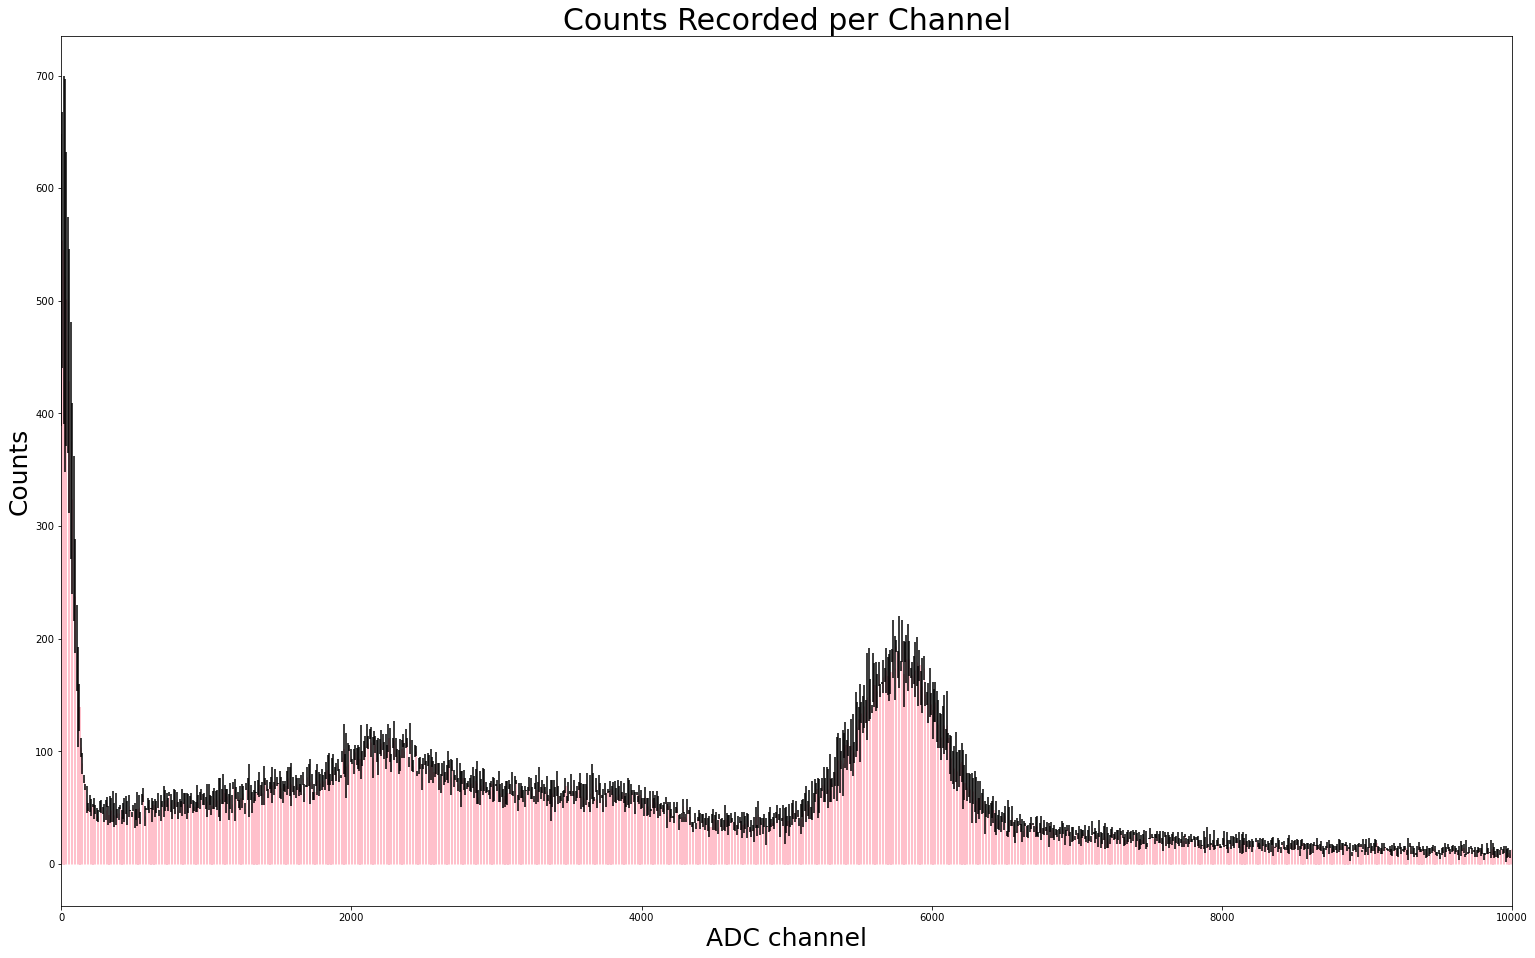

In [48]:
fig, ax = plt.subplots(figsize = (26,16))

# barplotting because it feels better than a histogram
ax.bar(x = data['ADC channel'], height = data['average'], width = 0.8, ec = 'pink', yerr = data['error'])
ax.set_xlim(xmin=0, xmax = 10000)

plt.xlabel('ADC channel', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
plt.title('Counts Recorded per Channel', fontsize = 30)